In [ ]:
## Import necessary libraries and datasets

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)

train_df = pd.read_csv('mental_health_train.csv')
test_df = pd.read_csv('mental_health_test.csv')

### Reusable functions for visualization and summarization

In [ ]:
### For visualization purposes

def plot_boxplot(df, column, dataset_title, figsize=(8, 2)):
    """
    Plots a boxplot for the given column in the dataframe.

    Parameters:
    - dataframe: The DataFrame containing the column to be plotted.
    - column: The column name for which the boxplot is generated.
    - figsize: size of the visualizatin
    """
    plt.figure(figsize=figsize)
    sns.boxplot(x=df[column], color='#FF9999')  # Boxplot for age
    plt.title(f'{column} column Boxplot ({dataset_title})')
    plt.xlabel(column)
    plt.show()

def plot_bar_chart(df, column, dataset_title, order='Order by Value', figsize=(10, 6)):
    """
    Plots a bar chart for a categorical column.

    Parameters:
    - df: The DataFrame containing the column to be plotted.
    - column: The column name for which the bar chart is generated.
    - figsize: Visualization size
    """
    if order == 'Order by Value':
        val_counts = df[column].value_counts().sort_index()
    elif order == 'Order by Count':
        val_counts = df[column].value_counts()

    plt.figure(figsize=figsize)
    ax = val_counts.plot(kind='bar', color='#9BC1BC', edgecolor='black')

    for i, v in enumerate(val_counts):
        ax.text(i, v + 0.05, str(v), ha='center', va='bottom', fontsize=12)

    plt.title(f'"{column}" Value Counts ({dataset_title})', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Value Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.show()

def plot_pie_chart(dataframe, column, dataset_title, figsize, colors=None):
    """
    Generates a pie chart for the specified column in the dataframe.

    Parameters:
    - dataframe: The DataFrame containing the column to be plotted.
    - column: The column name for which the pie chart is generated.
    - figsize: Tuple to define the figure size (default is (6, 6)).
    - colors: List of colors for the pie slices (optional, default is None).
    """
    value_counts = dataframe[column].value_counts()

    if colors is None:
        colors = plt.cm.Paired(range(len(value_counts)))

    plt.figure(figsize=figsize)
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)

    plt.title(f'"{column}" Distribution ({dataset_title})')
    plt.show()

def summarize_dataset(df, dataset_name="Dataset"):
    """
    Displays dimensions, duplicate row count, and column summary of a dataset.

    Parameters:
    - df: The DataFrame to summarize.
    - dataset_name: A string representing the dataset name (default is "Dataset").

    Returns:
    - A DataFrame summarizing column data types, unique values, missing data count, and missing data percentage.
    """
    print(f'{dataset_name.upper()}')
    print(f'Row count: {df.shape[0]}')
    print(f'Column count: {df.shape[1]}')
    print(f'Duplicated rows: {df.duplicated().sum()}\n')

    # Create column summary
    column_summary_df = pd.DataFrame({
        'Data Type': df.dtypes.values,
        'Unique Values': df.nunique().values,
        'Missing Data Count': df.isna().sum().values,
        'Missing Data Percentage': round((df.isna().sum() / df.shape[0]) * 100, 4)
    })

    return column_summary_df

# Data Analysis

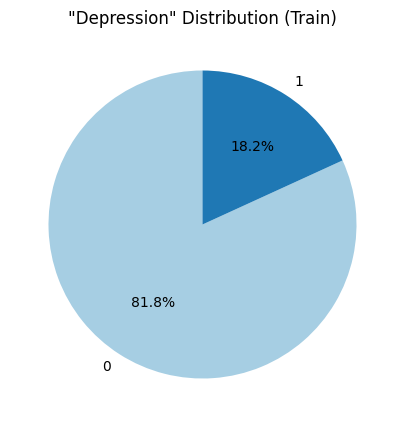

In [ ]:
## Display the distribution of the target column "Depression" in the TRAIN dataset

plot_pie_chart(train_df, 'Depression', "Train", figsize=(5, 5), colors=None)

In [ ]:
## Display dimensions and count of duplicated rows from the TEST dataset
## Column summary - data types, unique value count, missing data count, missing data percentage

train_summary = summarize_dataset(train_df, "Train")
train_summary

TRAIN
Row count: 140700
Column count: 20
Duplicated rows: 0



,Data Type,Unique Values,Missing Data Count,Missing Data Percentage
id,int64,140700,0,0.0000
Name,object,422,0,0.0000
Gender,object,2,0,0.0000
Age,float64,43,0,0.0000
City,object,98,0,0.0000
Working Professional or Student,object,2,0,0.0000
Profession,object,64,36630,26.0341
Academic Pressure,float64,5,112803,80.1727
Work Pressure,float64,5,27918,19.8422
CGPA,float64,331,112802,80.1720


In [ ]:
## Display dimensions and count of duplicated rows from the TEST dataset
## Column summary - data types, unique value count, missing data count, missing data percentage

test_summary = summarize_dataset(test_df, "Test")
test_summary

TEST
Row count: 93800
Column count: 19
Duplicated rows: 0



,Data Type,Unique Values,Missing Data Count,Missing Data Percentage
id,int64,93800,0,0.0000
Name,object,374,0,0.0000
Gender,object,2,0,0.0000
Age,float64,44,0,0.0000
City,object,68,0,0.0000
Working Professional or Student,object,2,0,0.0000
Profession,object,64,24632,26.2601
Academic Pressure,float64,5,75033,79.9925
Work Pressure,float64,5,18778,20.0192
CGPA,float64,326,75034,79.9936


# Data Pre-processing

#### "Name", "id", and "CGPA" columns:

In [ ]:
## Drop Name and id columns from both train and test datasets

train_df = train_df.drop(columns=['Name', 'id', 'CGPA'])
test_df = test_df.drop(columns=['Name', 'CGPA'])

#### "Financial Stress" column:

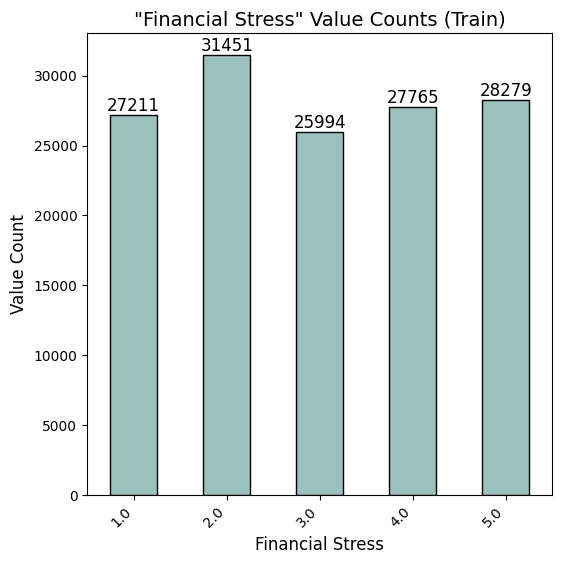

In [ ]:
## Fill missing values in the 'Financial Stress' column with its median
## Apply to the TRAIN dataset only, as there is no missing data for this column in the TEST dataset

train_df['Financial Stress'] = train_df['Financial Stress'].fillna(train_df['Financial Stress'].median())

plot_bar_chart(train_df, 'Financial Stress', "Train", figsize=(6, 6))

#### "Job Satisfaction" and "Study Satisfaction" columns:

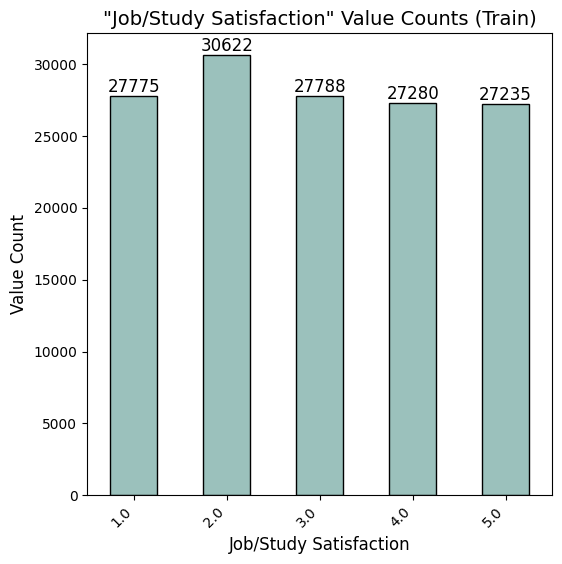

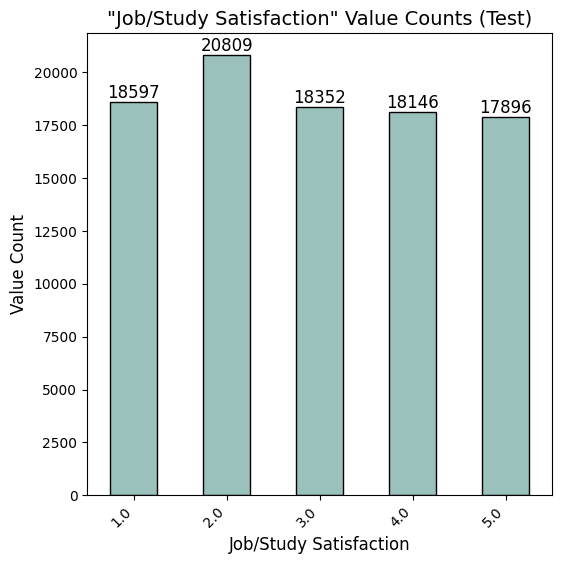

In [ ]:
## Merge "Job Satisfaction" and "Study Satisfaction" columns into one column called "Job/Study Satisfaction" for both TRAIN and TEST datasets

column_position = train_df.columns.get_loc("Job Satisfaction") + 1
train_df.insert(column_position, "Job/Study Satisfaction", np.nan)
train_df["Job/Study Satisfaction"] = train_df["Job/Study Satisfaction"].combine_first(train_df["Study Satisfaction"])
train_df["Job/Study Satisfaction"] = train_df["Job/Study Satisfaction"].combine_first(train_df["Job Satisfaction"])
train_df['Job/Study Satisfaction'] = train_df['Job/Study Satisfaction'].fillna(train_df['Job/Study Satisfaction'].median())

column_position = test_df.columns.get_loc("Job Satisfaction") + 1
test_df.insert(column_position, "Job/Study Satisfaction", np.nan)
test_df["Job/Study Satisfaction"] = test_df["Job/Study Satisfaction"].combine_first(test_df["Study Satisfaction"])
test_df["Job/Study Satisfaction"] = test_df["Job/Study Satisfaction"].combine_first(test_df["Job Satisfaction"])
test_df['Job/Study Satisfaction'] = test_df['Job/Study Satisfaction'].fillna(test_df['Job/Study Satisfaction'].median())

train_df = train_df.drop(columns=['Job Satisfaction', 'Study Satisfaction'])
test_df = test_df.drop(columns=['Job Satisfaction', 'Study Satisfaction'])

plot_bar_chart(train_df, 'Job/Study Satisfaction', "Train", figsize=(6, 6))
print('\n\n')
plot_bar_chart(test_df, 'Job/Study Satisfaction', "Test", figsize=(6, 6))

#### "Work Pressure" and "Academic Pressure" columns:

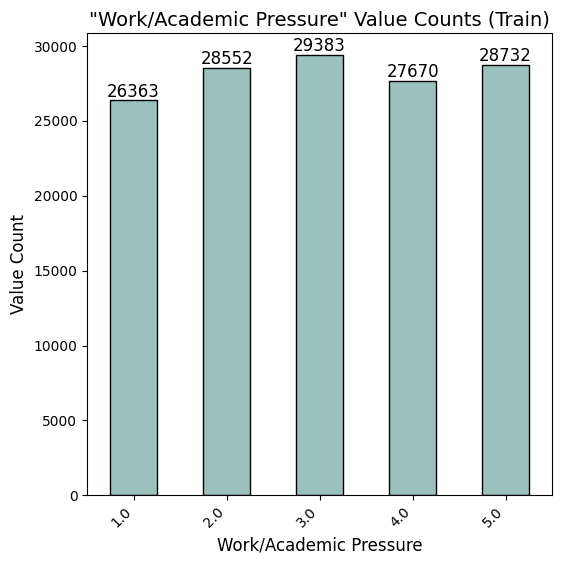

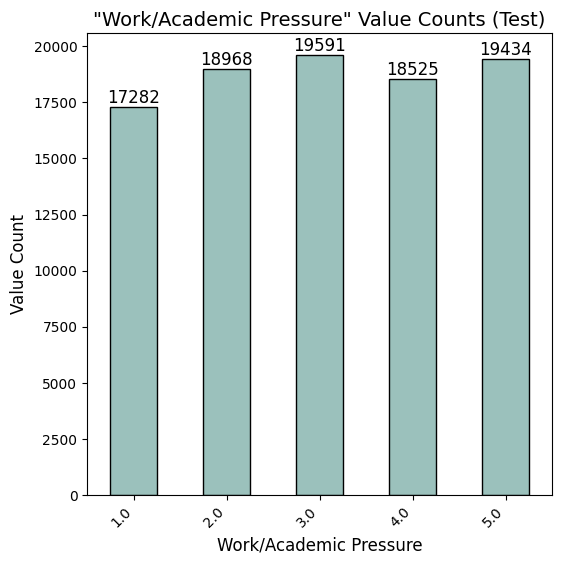

In [ ]:
## Merge "Work Pressure" and "Academic Pressure" columns into one column called "Work/Academic Pressure" of both TRAIN and TEST datasets

column_position = train_df.columns.get_loc("Work Pressure") + 1
train_df.insert(column_position, "Work/Academic Pressure", np.nan)
train_df["Work/Academic Pressure"] = train_df["Work/Academic Pressure"].combine_first(train_df["Academic Pressure"])
train_df["Work/Academic Pressure"] = train_df["Work/Academic Pressure"].combine_first(train_df["Work Pressure"])
train_df['Work/Academic Pressure'] = train_df['Work/Academic Pressure'].fillna(train_df['Work/Academic Pressure'].median())

column_position = test_df.columns.get_loc("Work Pressure") + 1
test_df.insert(column_position, "Work/Academic Pressure", np.nan)
test_df["Work/Academic Pressure"] = test_df["Work/Academic Pressure"].combine_first(test_df["Academic Pressure"])
test_df["Work/Academic Pressure"] = test_df["Work/Academic Pressure"].combine_first(test_df["Work Pressure"])
test_df['Work/Academic Pressure'] = test_df['Work/Academic Pressure'].fillna(test_df['Work/Academic Pressure'].median())

train_df = train_df.drop(columns=['Work Pressure', 'Academic Pressure'])
test_df = test_df.drop(columns=['Work Pressure', 'Academic Pressure'])

plot_bar_chart(train_df, 'Work/Academic Pressure', "Train", figsize=(6, 6))
print('\n\n')
plot_bar_chart(test_df, 'Work/Academic Pressure', "Test", figsize=(6, 6))

#### "Gender", "Working Professional or Student", "Have you ever had suicidal thoughts ?", and "Family History of Mental Illness" columns:

In [ ]:
## Encode "Gender", "Working Professional or Student", "Have you ever had suicidal thoughts ?",
## and "Family History of Mental Illness" columns of both TRAIN and TEST datasets

label_encoder = LabelEncoder()

binary_columns = ['Gender', 'Working Professional or Student',
                  'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

for column in binary_columns:
    label_encoder.fit(train_df[column])

    print(f"{column}:")
    for index, class_label in enumerate(label_encoder.classes_):
        print(f"{class_label}: {index}")
    print()

    train_df[column] = label_encoder.transform(train_df[column])
    test_df[column] = label_encoder.transform(test_df[column])

Gender:
Female: 0
Male: 1

Working Professional or Student:
Student: 0
Working Professional: 1

Have you ever had suicidal thoughts ?:
No: 0
Yes: 1

Family History of Mental Illness:
No: 0
Yes: 1



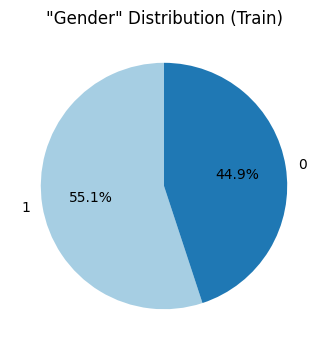

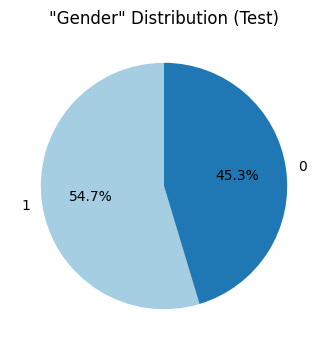

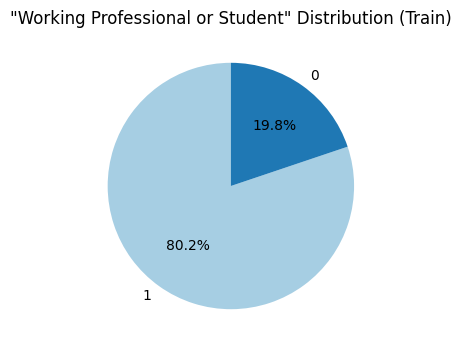

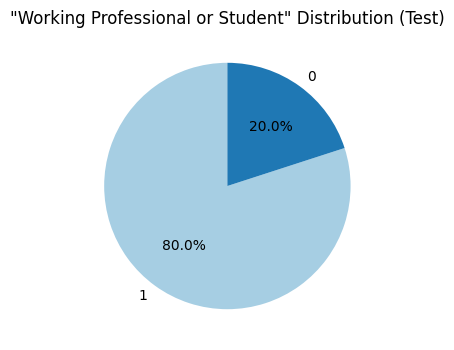

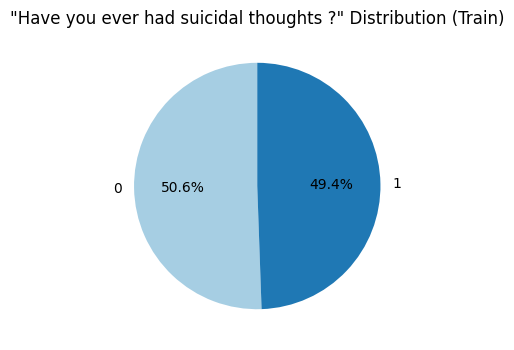

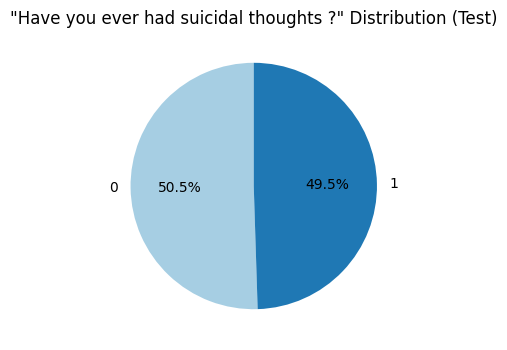

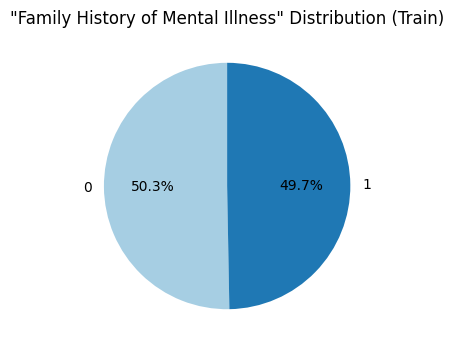

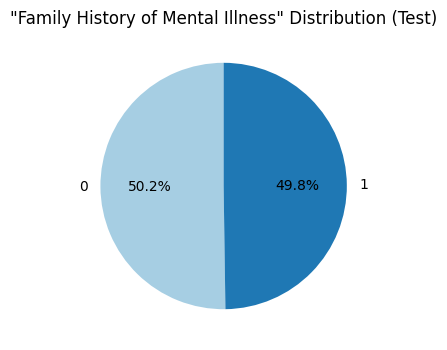

In [ ]:
## Plot chart for "Gender", "Working Professional or Student", "Have you ever had suicidal thoughts ?",
## and "Family History of Mental Illness"

for column in binary_columns:
    plot_pie_chart(train_df, column, "Train", figsize=(4, 4))
    plot_pie_chart(test_df, column, "Test", figsize=(4, 4))
    print('\n\n')

#### "Dietary Habits" column:

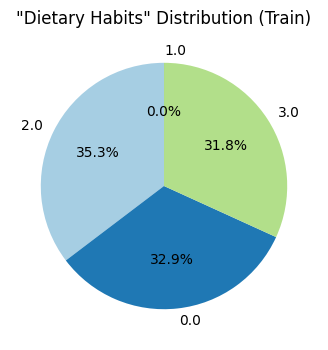

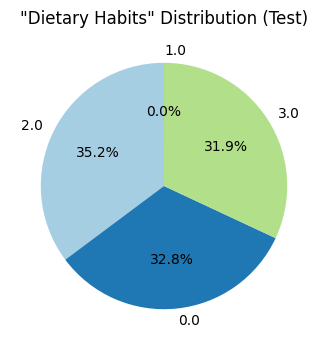

In [ ]:
## Categorize dietary habits into three categories - "Healthy", "Unhealthy", and "Moderate"

def categorize_dietary_habits(value):
    if pd.notna(value):
        value = value.lower()

        if value in ['yes', 'more healthy', 'healthy', '5 healthy']:
            return 'Healthy'
        elif value in ['no', 'less than healthy', 'no healthy', 'less healthy', '5 Unhealthy']:
            return 'Unhealthy'
        elif value in ['moderate']:
            return 'Moderate'
        else:
            return 'Unknown'

train_df['Dietary Habits'] = train_df['Dietary Habits'].apply(categorize_dietary_habits)
train_df['Dietary Habits'] = train_df['Dietary Habits'].fillna(train_df['Dietary Habits'].mode()[0])

test_df['Dietary Habits'] = test_df['Dietary Habits'].apply(categorize_dietary_habits)
test_df['Dietary Habits'] = test_df['Dietary Habits'].fillna(test_df['Dietary Habits'].mode()[0])

## Perform Ordinal Encoding on the column

encoder = OrdinalEncoder(categories=[['Unknown', 'Unhealthy', 'Moderate', 'Healthy']])
train_df['Dietary Habits'] = encoder.fit_transform(train_df[['Dietary Habits']])
test_df['Dietary Habits'] = encoder.transform(test_df[['Dietary Habits']])

plot_pie_chart(train_df, 'Dietary Habits', "Train", figsize=(4, 4))
plot_pie_chart(test_df, 'Dietary Habits', "Test", figsize=(4, 4))

#### "Sleep Duration" column:

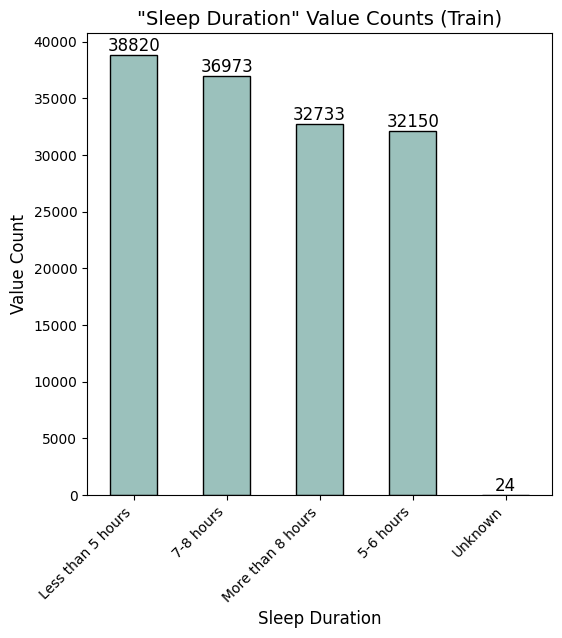

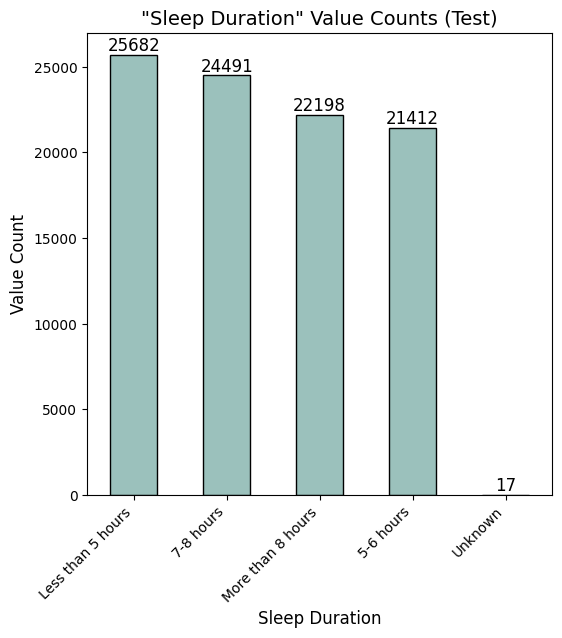

In [ ]:
## Categorize dietary habits into four categories - "Less than 5 hours", "5-6 hours", "7-8 hours", and "More than 8 hours"

def categorize_sleep_duration(value):
    if pd.notna(value):
        value = value.lower()

        if value in ['less than 5 hours', '3-4 hours', '4-5 hours', '4-6 hours', '2-3 hours', '1-6 hours', '1-2 hours', '1-3 hours', '3-6 hours']:
            return 'Less than 5 hours'

        elif value in ['5-6 hours', '6-7 hours', '6 hours']:
            return '5-6 hours'

        elif value in ['7-8 hours', '6-8 hours']:
            return '7-8 hours'

        elif value in ['more than 8 hours', '10-11 hours', '9-11 hours', '8-9 hours', '8 hours', '9-10 hours']:
            return 'More than 8 hours'
        else:
            return 'Unknown'

train_df['Sleep Duration'] = train_df['Sleep Duration'].apply(categorize_sleep_duration)
train_df['Sleep Duration'] = train_df['Sleep Duration'].fillna(train_df['Sleep Duration'].mode()[0])

test_df['Sleep Duration'] = test_df['Sleep Duration'].apply(categorize_sleep_duration)
test_df['Sleep Duration'] = test_df['Sleep Duration'].fillna(test_df['Sleep Duration'].mode()[0])

plot_bar_chart(train_df, 'Sleep Duration', "Train", "Order by Count", figsize=(6, 6))
print('\n\n')
plot_bar_chart(test_df, 'Sleep Duration', "Test", "Order by Count", figsize=(6, 6))

## Perform Ordinal Encoding on the column

encoder = OrdinalEncoder(categories=[['Unknown', 'Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours']])
train_df['Sleep Duration'] = encoder.fit_transform(train_df[['Sleep Duration']])
test_df['Sleep Duration'] = encoder.transform(test_df[['Sleep Duration']])

#### "City" column:

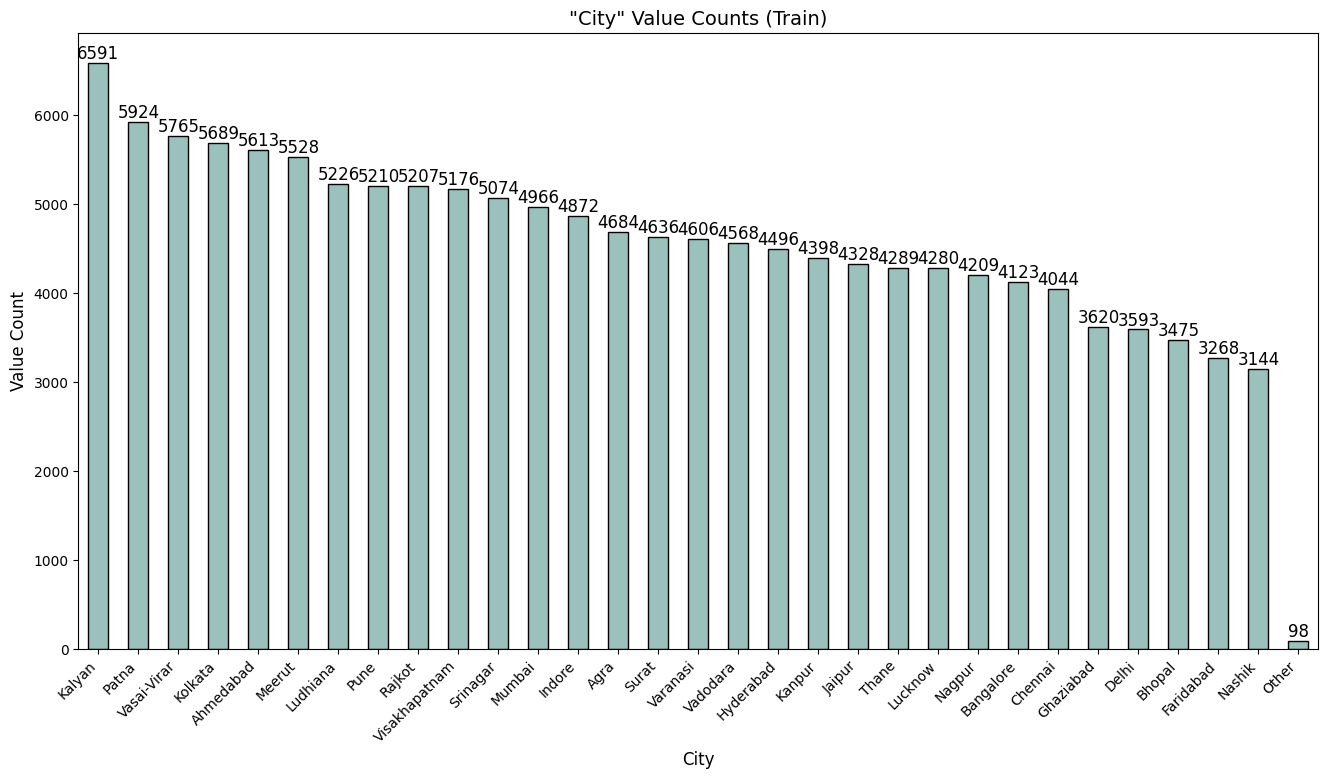

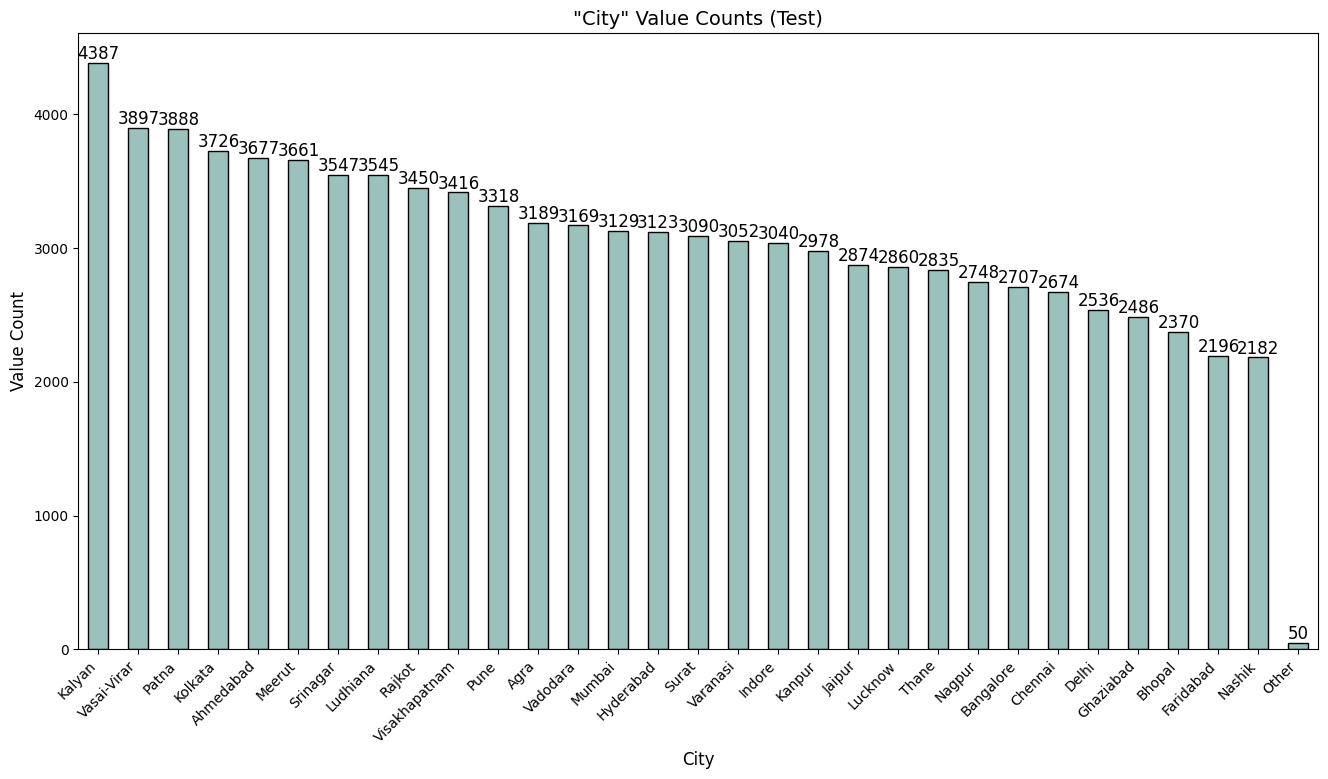

In [ ]:
## Update the cities with insignificant value counts to "Other"

city_counts = train_df['City'].value_counts()
other_cities = city_counts[city_counts < 10].index
train_df['City'] = train_df['City'].apply(lambda city: 'Other' if city in other_cities else city)

city_counts = test_df['City'].value_counts()
other_cities = city_counts[city_counts < 10].index
test_df['City'] = test_df['City'].apply(lambda city: 'Other' if city in other_cities else city)

plot_bar_chart(train_df, 'City', "Train", "Order by Count", figsize=(16, 8))
plot_bar_chart(test_df, 'City', "Test", "Order by Count", figsize=(16, 8))

## Perform Label Encoding on 31 unique cities (Note: Create an embedding layer in the NN model later)

encoder = LabelEncoder()
train_df['City'] = encoder.fit_transform(train_df['City'])
test_df['City'] = encoder.transform(test_df['City'])

#### "Degree" column:

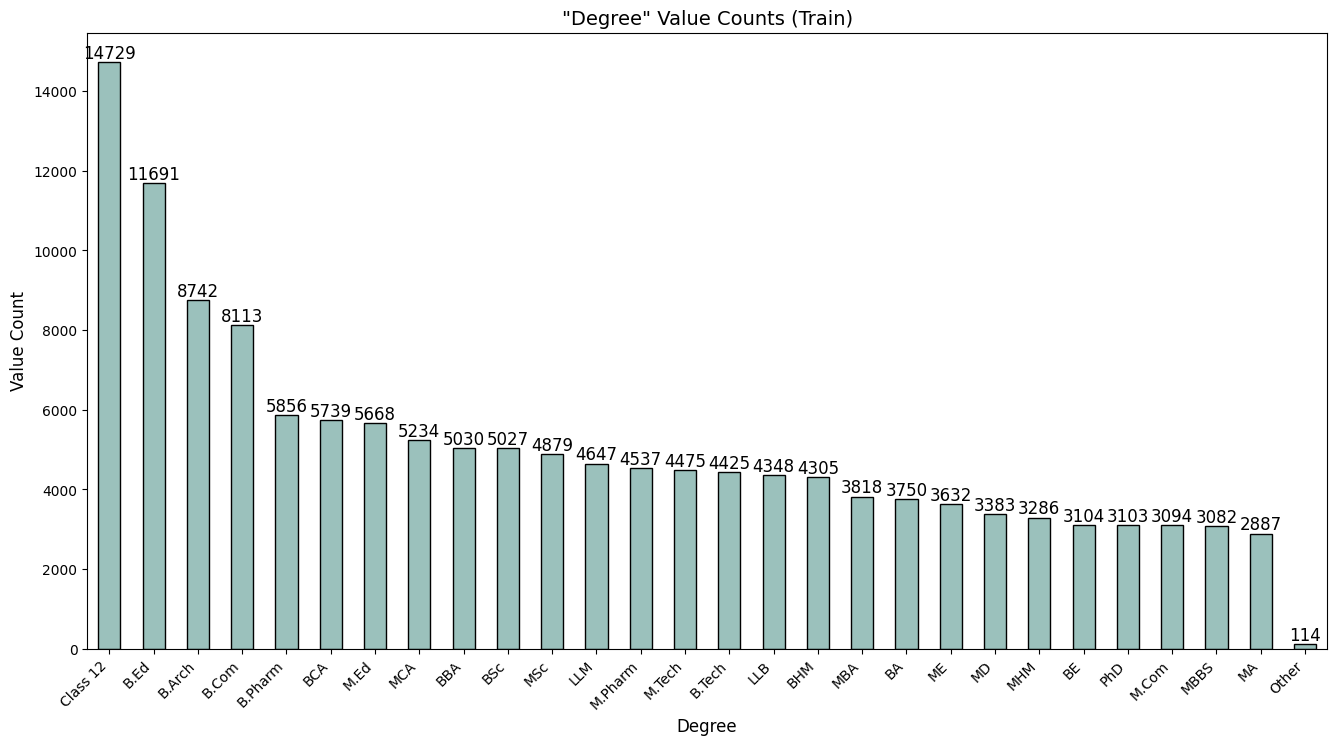

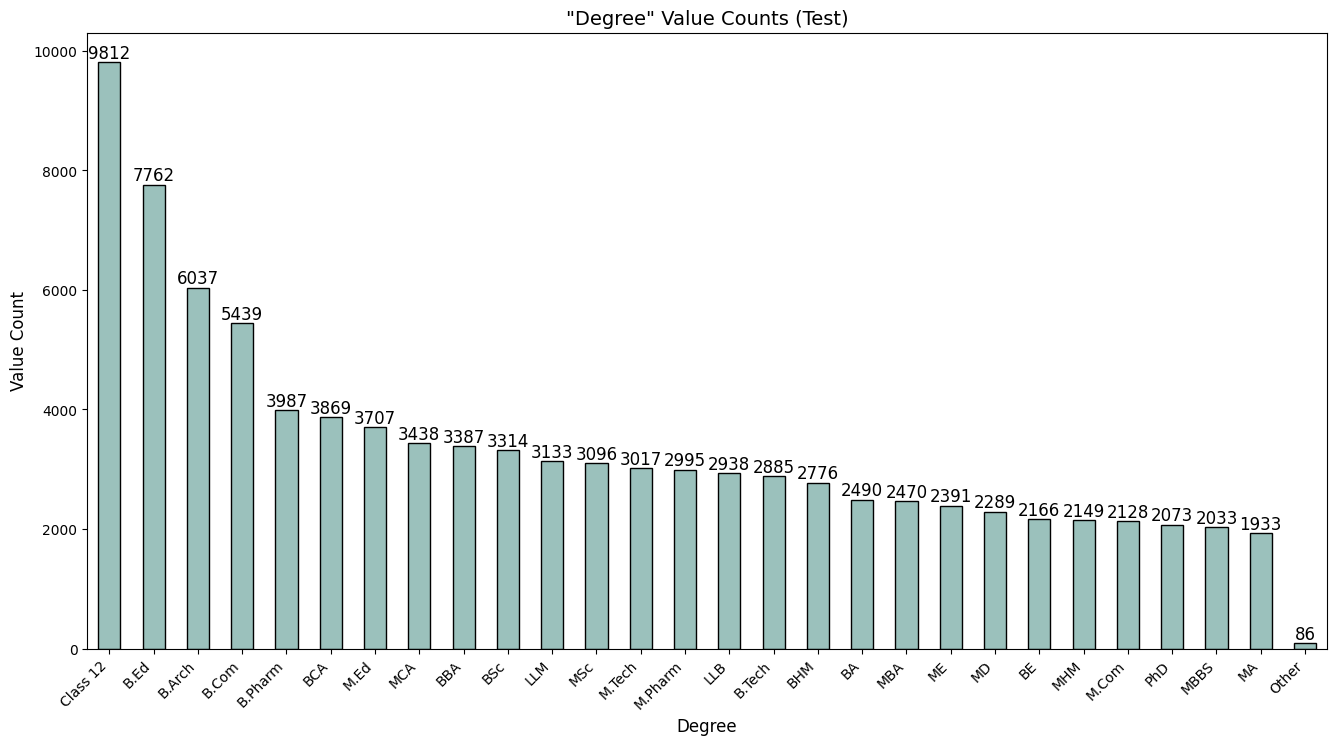

In [ ]:
## Update the degrees with insignificant value counts to "Other"

degree_counts = train_df['Degree'].value_counts()
other_degrees = degree_counts[degree_counts < 10].index
train_df['Degree'] = train_df['Degree'].apply(lambda degree: 'Other' if degree in other_degrees else degree)

degree_counts = test_df['Degree'].value_counts()
other_degrees = degree_counts[degree_counts < 10].index
test_df['Degree'] = test_df['Degree'].apply(lambda degree: 'Other' if degree in other_degrees else degree)
test_df['Degree'] = test_df['Degree'].fillna('Other')

plot_bar_chart(train_df, 'Degree', "Train", "Order by Count", figsize=(16, 8))
plot_bar_chart(test_df, 'Degree', "Test", "Order by Count", figsize=(16, 8))

## Perform Label Encoding on 27 unique degrees (Note: Create an embedding layer in the NN model later)

encoder = LabelEncoder()
train_df['Degree'] = encoder.fit_transform(train_df['Degree'])
test_df['Degree'] = encoder.transform(test_df['Degree'])

#### Profession column:

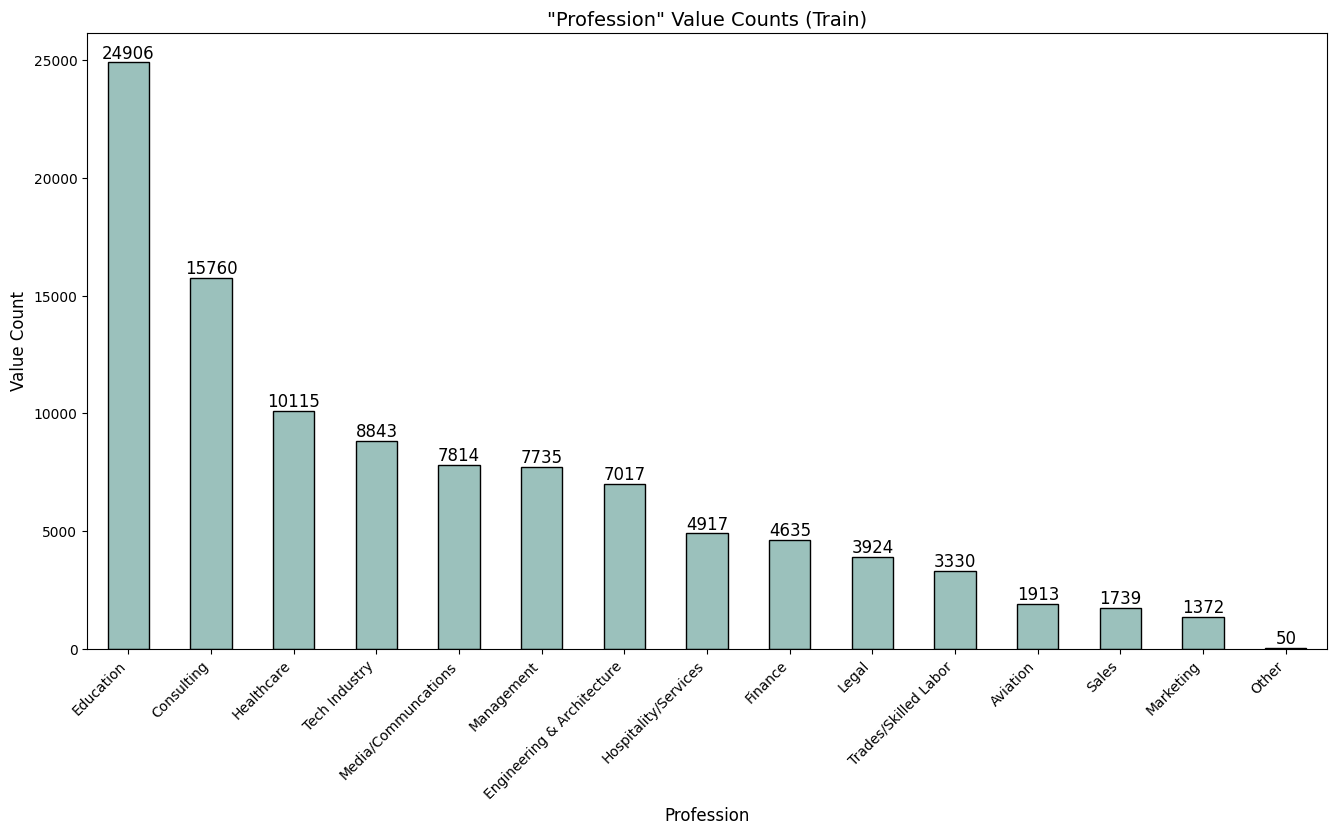

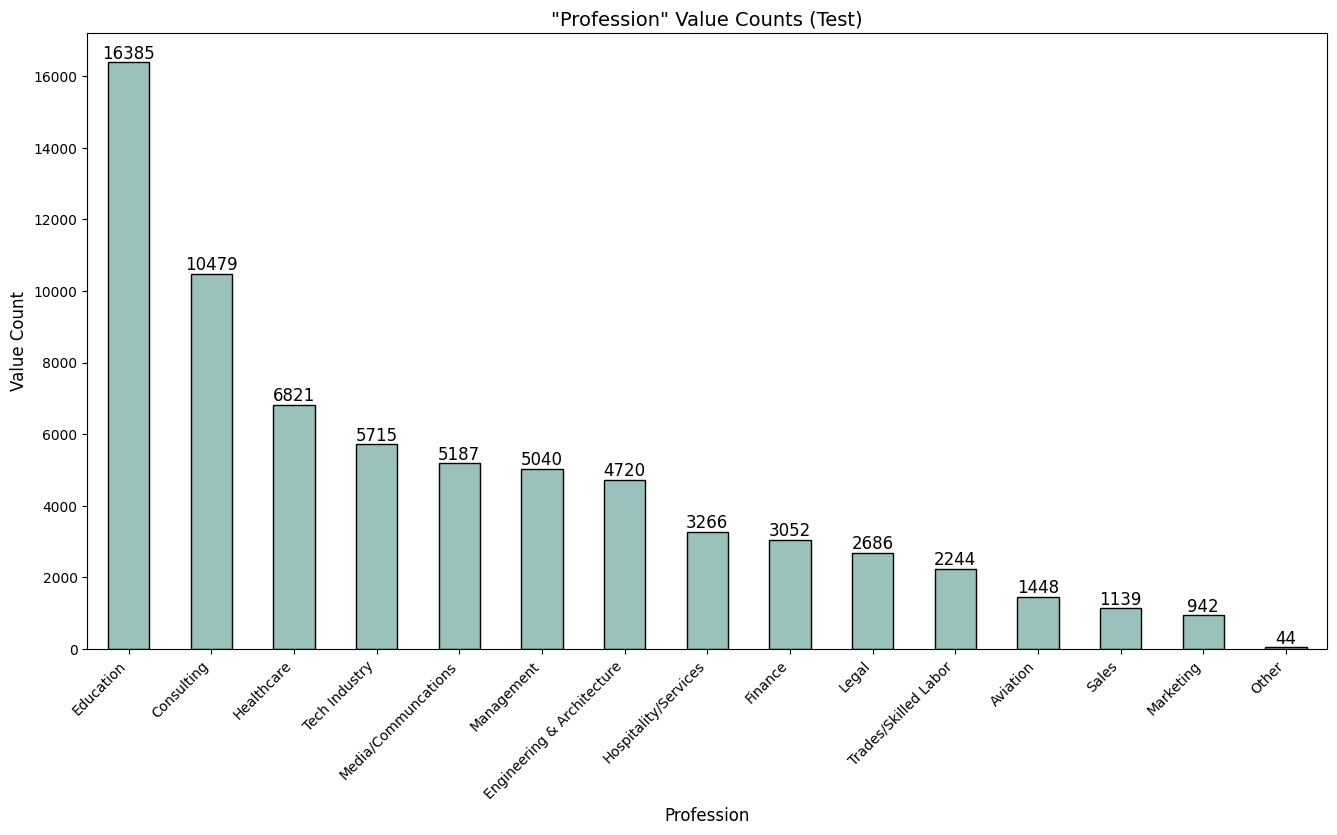

In [ ]:
## Update the professions with insignificant value counts to "Other"

profession_counts = train_df['Profession'].value_counts()
other_professions = profession_counts[profession_counts < 10].index
train_df['Profession'] = train_df['Profession'].apply(lambda profession: 'Other' if profession in other_professions else profession)

profession_counts = test_df['Profession'].value_counts()
other_professions = profession_counts[profession_counts < 10].index
test_df['Profession'] = test_df['Profession'].apply(lambda profession: 'Other' if profession in other_professions else profession)

## Map profession values to broader categories in the "Profession" column

profession_mapping = {
        'Chef': 'Hospitality/Services',
        'Teacher': 'Education',
        'Business Analyst': 'Consulting',
        'Finanancial Analyst': 'Finance',
        'Chemist': 'Healthcare',
        'Electrician': 'Trades/Skilled Labor',
        'Software Engineer': 'Tech Industry',
        'Data Scientist': 'Tech Industry',
        'Plumber': 'Trades/Skilled Labor',
        'Marketing Manager': 'Management',
        'Accountant': 'Finance',
        'Entrepreneur': 'Consulting',
        'HR Manager': 'Management',
        'UX/UI Designer': 'Tech Industry',
        'Content Writer': 'Media/Communcations',
        'Educational Consultant': 'Consulting',
        'Civil Engineer': 'Engineering & Architecture',
        'Manager': 'Management',
        'Pharmacist': 'Healthcare',
        'Financial Analyst': 'Finance',
        'Architect': 'Engineering & Architecture',
        'Mechanical Engineer': 'Engineering & Architecture',
        'Customer Support': 'Hospitality/Services',
        'Consultant': 'Consulting',
        'Judge': 'Legal',
        'Researcher': 'Tech Industry',
        'Pilot': 'Aviation',
        'Graphic Designer': 'Tech Industry',
        'Travel Consultant': 'Consulting',
        'Digital Marketer': 'Marketing',
        'Lawyer': 'Legal',
        'Research Analyst': 'Consulting',
        'Sales Executive': 'Sales',
        'Doctor': 'Healthcare',
        'Investment Banker': 'Finance',
        'Family Consultant': 'Consulting',
        'Dev': 'Tech Industry',
        'Academic': 'Education',
        'City Manager': 'Management',
        'Medical Doctor': 'Healthcare',
        'Other': 'Other'
}
train_df['Profession'] = train_df['Profession'].map(profession_mapping)
test_df['Profession'] = test_df['Profession'].map(profession_mapping)

plot_bar_chart(train_df, 'Profession', "Train", "Order by Count", figsize=(16, 8))
plot_bar_chart(test_df, 'Profession', "Test", "Order by Count", figsize=(16, 8))

## Perform Label Encoding on 15 unique professions (Note: Create an embedding layer in the NN model later)

encoder = LabelEncoder()
train_df['Profession'] = encoder.fit_transform(train_df['Profession'])
test_df['Profession'] = encoder.transform(test_df['Profession'])

#### Drop duplicates

In [ ]:
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

#### Dataset summarization after pre-processing:

In [ ]:
train_summary = summarize_dataset(train_df, "Train")
train_summary

TRAIN
Row count: 140690
Column count: 15
Duplicated rows: 0



,Data Type,Unique Values,Missing Data Count,Missing Data Percentage
Gender,int64,2,0,0.0
Age,float64,43,0,0.0
City,int64,31,0,0.0
Working Professional or Student,int64,2,0,0.0
Profession,int64,16,0,0.0
Work/Academic Pressure,float64,5,0,0.0
Job/Study Satisfaction,float64,5,0,0.0
Sleep Duration,float64,5,0,0.0
Dietary Habits,float64,4,0,0.0
Degree,int64,29,0,0.0


In [ ]:
test_summary = summarize_dataset(test_df, "Test")
test_summary

TEST
Row count: 93800
Column count: 15
Duplicated rows: 0



,Data Type,Unique Values,Missing Data Count,Missing Data Percentage
id,int64,93800,0,0.0
Gender,int64,2,0,0.0
Age,float64,44,0,0.0
City,int64,31,0,0.0
Working Professional or Student,int64,2,0,0.0
Profession,int64,16,0,0.0
Work/Academic Pressure,float64,5,0,0.0
Job/Study Satisfaction,float64,5,0,0.0
Sleep Duration,float64,5,0,0.0
Dietary Habits,float64,4,0,0.0


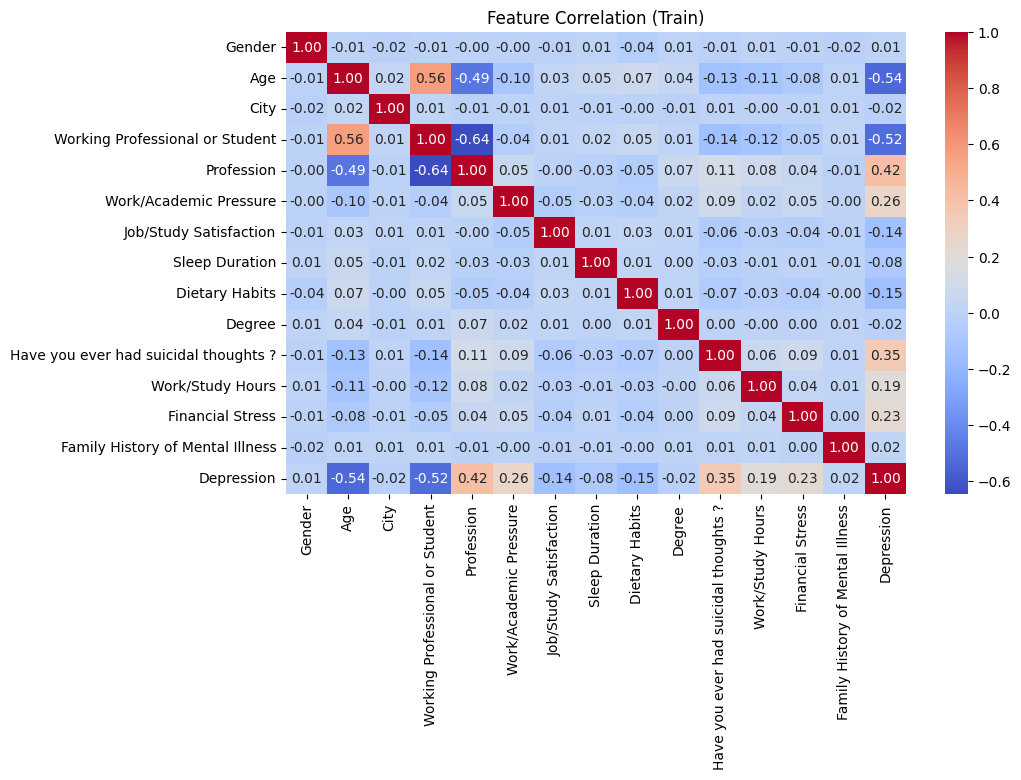

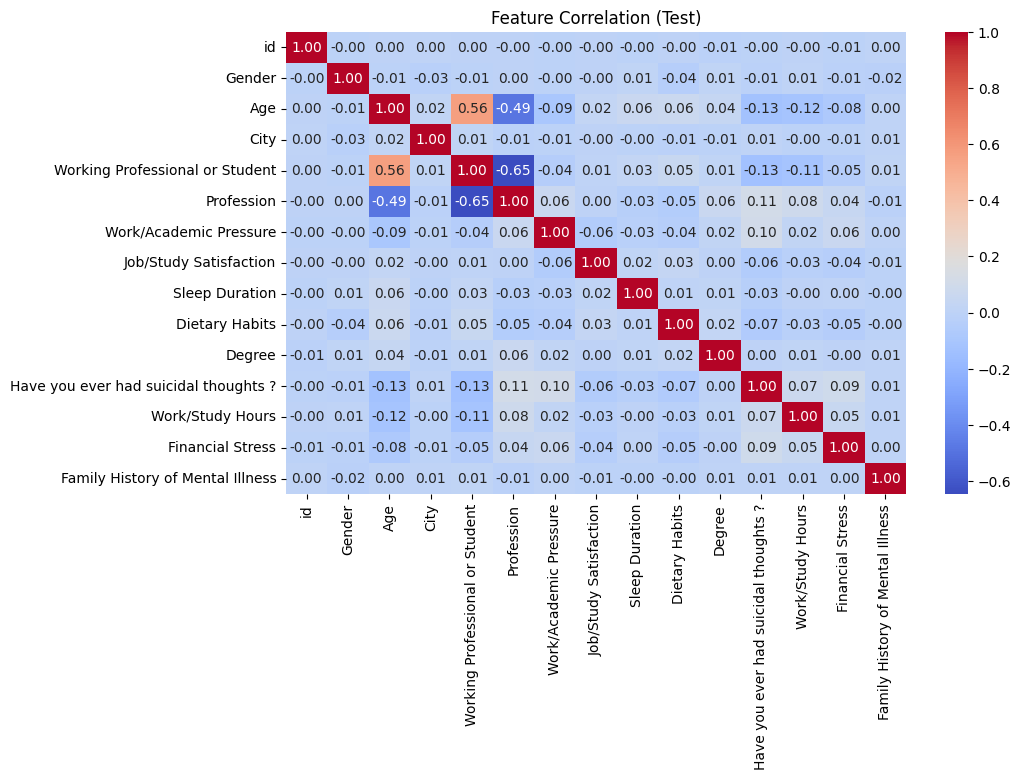

In [ ]:
## Feature Correlation

plt.figure(figsize=(10, 6))
sns.heatmap(train_df.corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation (Train)")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(test_df.corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation (Test)")
plt.show()

In [ ]:
train_df.to_csv('cleaned_train_dataset.csv', index=False)
test_df.to_csv('cleaned_test_dataset.csv', index=False)

# Applying TabNet from Google Research - pre-trained model.

1. Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

"""
Feature Scaling Script using MinMaxScaler

This script applies Min-Max normalization to selected numerical features in the dataset.
Scaling ensures that features are on the same scale, improving deep learning performance.

Steps:
1. Load the cleaned training and test datasets.
2. Identify numerical features to scale (excluding categorical & target variables).
3. Apply MinMax Scaling (scales values between 0 and 1).
4. Save the transformed datasets for further training.
"""

# Load dataset
train_df = pd.read_csv("cleaned_train_dataset.csv")
test_df = pd.read_csv("cleaned_test_dataset.csv")

# Identify features to scale (excluding categorical variables and target)
features_to_scale = [
    "Age", "Work/Academic Pressure", "Job/Study Satisfaction",
    "Sleep Duration", "Dietary Habits", "Degree", "Work/Study Hours",
    "Financial Stress"
]

# Initialize scaler
scaler = MinMaxScaler()

# Apply scaling to training and test sets
train_df[features_to_scale] = scaler.fit_transform(train_df[features_to_scale])
test_df[features_to_scale] = scaler.transform(test_df[features_to_scale])

# Save the scaled datasets for training
train_df.to_csv("scaled_mental_train_dataset.csv", index=False)
test_df.to_csv("scaled_mental_test_dataset.csv", index=False)

print("Feature scaling applied successfully!")


Feature scaling applied successfully!


2. Train & Predict using TabNet:

In [ ]:
!pip install pytorch-tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
import torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.19565 |  0:00:36s
epoch 1  | loss: 0.1792  |  0:01:05s
epoch 2  | loss: 0.17521 |  0:01:36s
epoch 3  | loss: 0.17301 |  0:02:05s
epoch 4  | loss: 0.1698  |  0:02:36s
epoch 5  | loss: 0.17    |  0:03:06s
epoch 6  | loss: 0.17019 |  0:03:36s
epoch 7  | loss: 0.16773 |  0:04:07s
epoch 8  | loss: 0.16911 |  0:04:37s
epoch 9  | loss: 0.16748 |  0:05:07s
epoch 10 | loss: 0.16698 |  0:05:38s
epoch 11 | loss: 0.16382 |  0:06:08s
epoch 12 | loss: 0.16412 |  0:06:37s
epoch 13 | loss: 0.16313 |  0:07:07s
epoch 14 | loss: 0.16253 |  0:07:36s
epoch 15 | loss: 0.16609 |  0:08:10s
epoch 16 | loss: 0.16262 |  0:08:40s
epoch 17 | loss: 0.16251 |  0:09:10s
epoch 18 | loss: 0.16256 |  0:09:40s
epoch 19 | loss: 0.162   |  0:10:09s
epoch 20 | loss: 0.16168 |  0:10:39s
epoch 21 | loss: 0.16106 |  0:11:09s
epoch 22 | loss: 0.16062 |  0:11:39s
epoch 23 | loss: 0.16049 |  0:12:09s
epoch 24 | loss: 0.16067 |  0:12:38s
epoch 25 | loss: 0.16066 |  0:13:09s
epoch 26 | loss: 0.15997 |  0:13:40s
e

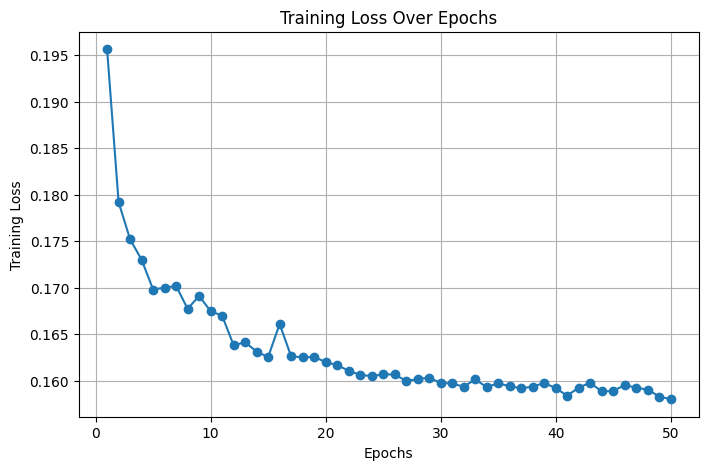

Final Training Accuracy: 0.9385


In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

"""
Load the preprocessed and scaled training and test datasets.
Scaling ensures that numerical features are normalized for better model performance.
"""
# Load datasets
train_df = pd.read_csv("scaled_mental_train_dataset.csv")
test_df = pd.read_csv("scaled_mental_test_dataset.csv")

"""
Separate the target variable ('Depression') from the feature set.
- X_train: Feature matrix for training
- y_train: Target labels for training
- X_test: Feature matrix for test (without 'id' column)
"""
# Separate Features and Target
X_train = train_df.drop(columns=["Depression"]).values
y_train = train_df["Depression"].values
X_test = test_df.drop(columns=["id"]).values  # Remove 'id' for prediction

"""
Initialize the TabNet deep learning model for classification.
TabNet combines deep learning and decision tree-based learning techniques.
"""
# Define TabNet Classifier
tabnet = TabNetClassifier()

"""
Train the TabNet model using the training dataset.
- max_epochs: Maximum number of epochs for training.
- batch_size: Number of samples per batch.
- virtual_batch_size: Helps with batch normalization.
- patience: Stops training early if performance does not improve.
"""

# Train TabNet and extract loss values manually
tabnet.fit(
    X_train, y_train,
    max_epochs=50, batch_size=128, virtual_batch_size=32, patience=10
)

"""
Retrieve training loss per epoch from TabNet's history.
This is used to analyze how well the model learns over time.
"""
# Extract loss history from TabNet model
train_loss = tabnet.history["loss"]  # TabNet stores loss in `history["loss"]`
epochs = len(train_loss)

"""
Plot the training loss over epochs to visualize how the model improves during training.
A decreasing loss curve indicates better learning.
"""
# Plot Training Loss Over Epochs
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), train_loss, marker='o', linestyle='-')
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss Over Epochs")
plt.grid()
plt.show()

"""
Generate predictions on the training dataset.
This helps evaluate how well the model has learned from the training data.
"""
from sklearn.metrics import accuracy_score

# Make predictions on training data
train_preds = tabnet.predict(X_train)

"""
Calculate the training accuracy of the model.
Accuracy is the proportion of correctly classified samples over total samples.
"""
# Compute Training Accuracy
train_accuracy = accuracy_score(y_train, train_preds)
print(f"Final Training Accuracy: {train_accuracy:.4f}")


3. Generate Classification Report & Confusion Matrix

In [ ]:
# Make Predictions on Training Data
train_preds = tabnet.predict(X_train)

# Compute Accuracy
train_accuracy = accuracy_score(y_train, train_preds)
print(f"Final Training Accuracy: {train_accuracy:.4f}")

# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_train, train_preds))

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_train, train_preds)
print("\nConfusion Matrix:")
print(conf_matrix)


Final Training Accuracy: 0.9385

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96    115132
           1       0.83      0.84      0.83     25558

    accuracy                           0.94    140690
   macro avg       0.89      0.90      0.90    140690
weighted avg       0.94      0.94      0.94    140690


Confusion Matrix:
[[110615   4517]
 [  4140  21418]]


4. Generate and save prediction files

In [ ]:
"""
This section ensures that the TabNet model has been trained before making predictions.

Steps:
1. Check if the variable 'tabnet' exists in the local scope.
   - If 'tabnet' is not found, print an error message and prevent execution.
   - This avoids running predictions on an untrained model.
2. If the model is trained:
   - Generate predictions on the test dataset.
   - Convert predictions to integer format for consistency.
   - Check if the test dataset contains an 'id' column:
     - If 'id' exists, use it in the final submission file.
     - If 'id' is missing, use the dataset index instead and issue a warning.
3. Save the predictions as a CSV file named 'TabNet_predictions.csv' for submission.
"""

# Ensure Model Has Been Trained Before Predicting
if "tabnet" not in locals():
    print("Error: TabNet model is not trained yet! Train the model first.")
else:
    # Make Predictions on Test Data
    predictions = tabnet.predict(X_test)

    # Convert predictions to integers (ensure format consistency)
    predictions = np.array(predictions).astype(int)  # Ensure it's a NumPy array

    # Ensure the 'id' column exists in the test dataset
    if "id" in test_df.columns:
        submission_df = pd.DataFrame({
            "id": test_df["id"],  # Extract 'id' from test set
            "Depression": predictions  # TabNet predictions
        })
    else:
        print("Warning: 'id' column not found in test dataset! Using index as ID.")
        submission_df = pd.DataFrame({
            "id": test_df.index,  # Use row index as ID if 'id' is missing
            "Depression": predictions
        })

    # Save Predictions to CSV
    submission_file = "TabNet_predictions.csv"
    submission_df.to_csv(submission_file, index=False)

    print(f"Predictions saved as {submission_file}")


Predictions saved as TabNet_predictions.csv
